# Supervised learning

- It's used when we want to predict an outcome from a given input, and we have examples of input–output pairs.
- Two main types: classification and regression.
- Classification: For a given input, predict class label from a set of possible labels.
    - binary classification (Email: spam or non-spam)
    - multi-class classification (Iris flower classification: setosa, virginica, versicolor)
- Regression: For a given input, predict a real number (given its size, predict a house's price)

## *k*-NN classifier

- Consider $k$ neighbors of a test data point. 
- If $k>1$, use voting to assign a label. 
- Figure: Guido&mueller, p. 36, showing the example for $k=3$.

**Model complexity for $k$-NN model**

- When $k$ small
  - The model makes predictions based on the nearest individual training data point. 
  - This leads to a very fine-grained decision boundary that can adapt closely to the training data, even capturing noise.
  - Each training point essentially has its own "influence zone," making the model highly flexible but prone to overfitting.

- When $k$ is large:
  - The model averages the influence of multiple neighbors to make predictions.
  - This results in a **smoother decision boundary that is less sensitive to individual points, making the model more **generalized** and less prone to overfitting.


![alt text](images/threeNN.png)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

# plt.style.use("fivethirtyeight")
plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 100
font = {"family": "sans-serif", "size": 18}

mpl.rc("font", **font)

In [21]:
cancer = datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Number of neighbors')

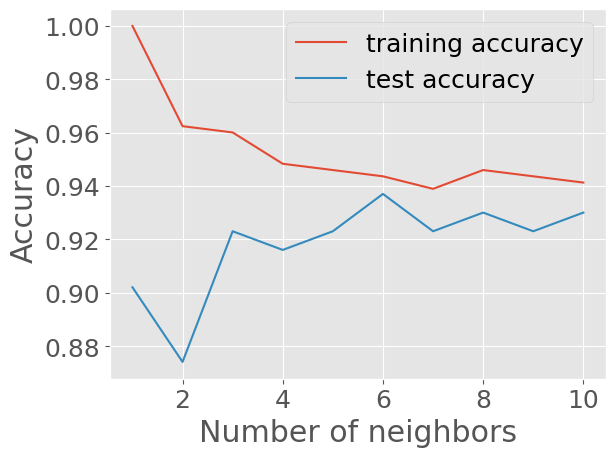

In [22]:
# code from Guido & Mueller

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target
)

# For the breast cancer dataset: cancer.target contains binary values (0 for malignant and 1 for benign). Suppose 62% of the samples are benign and 38% are malignant. Using `stratify=cancer.target` ensures that both the training and test sets maintain this same proportion of benign and malignant samples.

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
pass
# note that this plot is a horizontally flipped version of the generalization error plot in 03-notebook.ipynb

## *k*NN regression

- Unlike *k*NN classification, where the output is a class label, *k*NN regression predicts a numerical value based on the average (or sometimes weighted average) of the target values of the $k$ nearest neighbors.

1. Choose the Number of Neighbors $k$
2. Find its $k$-nearest Neighbors (Eucledian distance is often used)
3. Compute the Predicted Value by taking the mean of the target values of the $k$-nearest neighbors.

- Simple
- **Non-parametric**: No assumptions about the underlying data distribution. Important!
- Works well with both linear and non-linear relationships.
- Computationally expensive

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^k y_i
$$

Another possibility: take weighted average where closer neighbors having more influence
$$
\hat{y} = \frac{\sum_{i=1}^k w_i y_i}{\sum_{i=1}^k w_i}, \quad w_i = \frac{1}{\text{distance to neighbor}_i}
$$


![](images/threeNNregression.png)



Mean-squared error ([Scikit documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error))

$$
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
$$

$R^2$ score (**coefficient of determination**)

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Where:

Residual Sum of Squares

$$
  \text{SS}_{\text{res}} = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

$y_i$: Actual value, $\hat{y}_i$: Predicted value

Total Sum of Squares

$$
  \text{SS}_{\text{tot}} = \sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2
$$

KNeighborsRegressor(n_neighbors=3)

Mean Squared Error: 5.854038551615032
R-squared: 0.9903039677369723


Text(0.5, 1.0, '$K$NN Regression')

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Target')

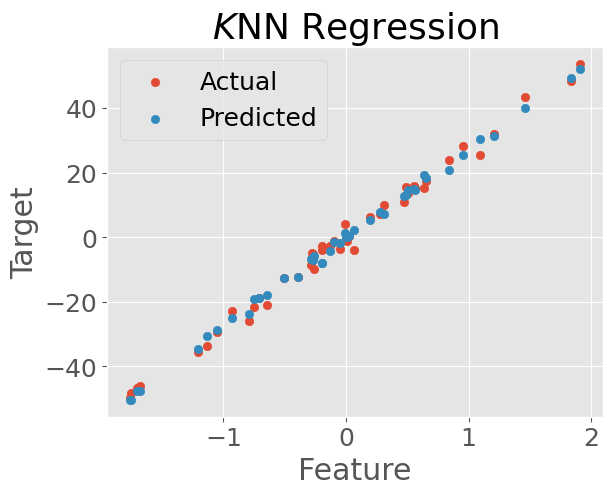

In [23]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Synthetic dataset
X, y = make_regression(n_samples=300, n_features=1, noise=2, random_state=7)
# X,y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=9
)

# training
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# predictions
y_pred = knn_regressor.predict(X_test)

# performance

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.title("$K$NN Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
pass

## Linear regression

- Ordinary Linear  (OLS)
  
The simplest regression method. It finds the slope and the intercept by minimizing MSE between predictions and true target values in the training set. 


Slope = [29.53772937]
Intercept = -1.8461913570186357
Training set score: 0.69
Test set score = 0.6432286945616815
Mean Squared Error: 316.7233489158694
$R^2$= 0.6432286945616815


Text(0.5, 1.0, 'Test data')

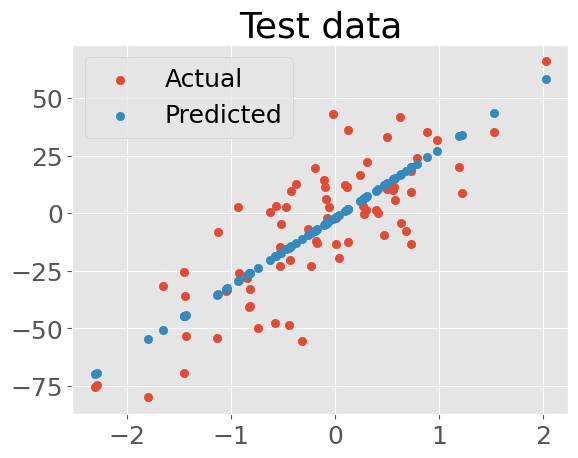

In [24]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Synthetic dataset
X, y = make_regression(n_samples=300, n_features=1, noise=20, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(
    f"Slope = {lr.coef_}",
)
print(f"Intercept = {lr.intercept_}")

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print(f"Test set score = {lr.score(X_test, y_test)}")

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(r"$R^2$" f"= {r2_score(y_test, y_pred)}")

# plt.scatter(X_train,y_train)
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.title("Test data")
plt.legend()
pass
# $R^2$ is low but both the training  and test sets have similar values. Possible underfitting (not overfitting).

## Let's now work with a more complicated diabetes data

In [25]:
diabetes = datasets.load_diabetes()
diabetes.keys()
print(diabetes["DESCR"])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [26]:
import seaborn as sns
import pandas as pd

# diabetes.target
# exploratory data analysis. please do it before trying any ML model
# sns.pairplot(pd.DataFrame(diabetes.data)) # commented out as it takes a few seconds to run. uncomment and check!

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0
)

## Multiple linear regression

$$
\min_w \sum_{i=1}^{n} (y_i - X_i w)^2
$$

In [28]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"Coefficients = {lr.coef_}")
print(f"Intercept = {lr.intercept_}")

print(f"Training set r2 score = {lr.score(X_train, y_train):.2f}")
print(f"Test set r2 score = {lr.score(X_test, y_test):.2f}")

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
pass

Coefficients = [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
Intercept = 153.06786205925664
Training set r2 score = 0.56
Test set r2 score = 0.36
Mean Squared Error: 3180.16


## Ridge regression

Linear regression with an **L2 regularization** term to prevent overfitting by penalizing large coefficients. It's useful when there are **many correlated features** in the dataset.

$$
\min_w \sum_{i=1}^{n} (y_i - X_i w)^2 + \alpha \sum_{j=1}^{D} w_j^2
$$

$\alpha$ is the regularization parameter (controls the strength of penalty). A higher $\alpha$ shrinks the coefficients towards zero, reducing model complexity. It **does not eliminate features**, though.


alpha=0.001, training score=0.56, test score = 0.36, Test MSE = 3183.96
alpha=0.01, training score=0.55, test score = 0.36, Test MSE = 3193.77
alpha=0.1, training score=0.55, test score = 0.37, Test MSE = 3132.42
alpha=1, training score=0.46, test score = 0.36, Test MSE = 3192.32
alpha=10, training score=0.17, test score = 0.14, Test MSE = 4252.86
alpha=100, training score=0.02, test score = 0.02, Test MSE = 4865.76


Text(0, 0.5, '$R^2$')

Text(0.5, 0, '$\\alpha$')

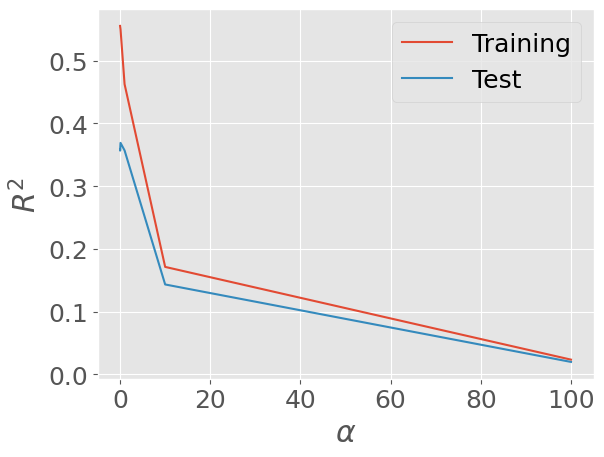

In [29]:
from sklearn.linear_model import Ridge

# alpha = 0 is OLS for Ridge

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

training_score = []
test_score = []
training_mse = []
test_mse = []

for val in alpha_values:
    ridge = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    train_score = ridge.score(X_train, y_train)
    tst_score = ridge.score(X_test, y_test)
    test_mse = mean_squared_error(y_test, y_pred)
    training_score.append(train_score)
    test_score.append(tst_score)
    print(
        f"alpha={val}, training score={train_score:.2f}, test score = {tst_score:.2f}, Test MSE = {test_mse:.2f}"
    )
plt.plot(alpha_values, training_score, label="Training")
plt.plot(alpha_values, test_score, label="Test")
plt.legend()
plt.ylabel("$R^2$")
plt.xlabel(r"$\alpha$")
pass

## Lasso Regression

Linear regression that includes **L1 regularization** to reduce overfitting and perform **feature selection** by shrinking some coefficients to exactly **zero**. (unlike Ridge!)

$$
\min_w (1/2n)\sum_{i=1}^{n} (y_i - X_i w)^2 + \alpha \sum_{j=1}^{D} |w_j|
$$

**Works well when there are many features**, especially if only a few are important.

Lower $\alpha$ allows more non-zero coefficient


alpha=0.001, training score=0.56, test score = 0.36, Test MSE = 3183.39, Number of features = 10
alpha=0.01, training score=0.55, test score = 0.35, Test MSE = 3206.40, Number of features = 9
alpha=0.1, training score=0.55, test score = 0.36, Test MSE = 3202.02, Number of features = 7
alpha=1, training score=0.41, test score = 0.28, Test MSE = 3583.41, Number of features = 2
alpha=10, training score=0.00, test score = -0.00, Test MSE = 4965.13, Number of features = 0
alpha=100, training score=0.00, test score = -0.00, Test MSE = 4965.13, Number of features = 0


Text(0, 0.5, '$R^2$')

Text(0.5, 0, '$\\alpha$')

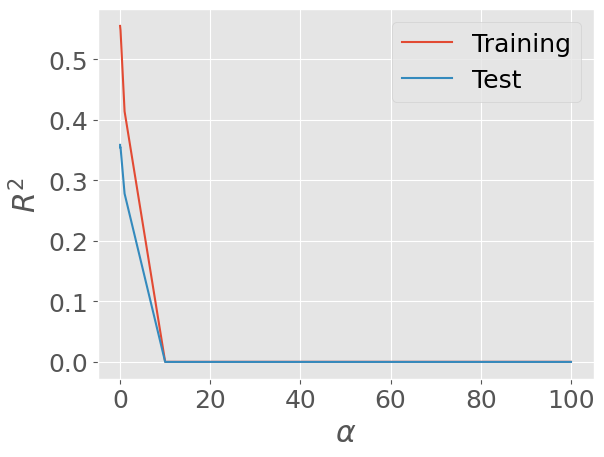

In [30]:
from sklearn.linear_model import Lasso

training_score = []
test_score = []
training_mse = []
test_mse = []

for val in alpha_values:
    lasso = Lasso(alpha=val, max_iter=100000).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    train_score = lasso.score(X_train, y_train)
    tst_score = lasso.score(X_test, y_test)
    test_mse = mean_squared_error(y_test, y_pred)
    training_score.append(train_score)
    test_score.append(tst_score)
    print(
        f"alpha={val}, training score={train_score:.2f}, test score = {tst_score:.2f}, Test MSE = {test_mse:.2f}, Number of features = {np.sum(lasso.coef_ != 0)}"
    )
plt.plot(alpha_values, training_score, label="Training")
plt.plot(alpha_values, test_score, label="Test")
plt.legend()
plt.ylabel("$R^2$")
plt.xlabel(r"$\alpha$")
pass

## Rough guidelines
- First try ridge regression
- If you have a large amount of features and expect only a few of them to be  important, try Lasso.
- Also, use LASSO if you want an interpretable model.

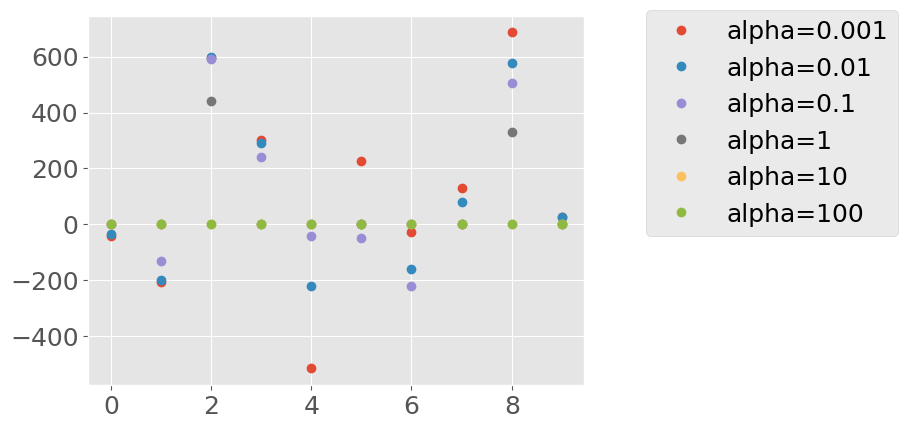

In [31]:
for val in alpha_values:
    lasso = Lasso(alpha=val, max_iter=100000).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    plt.plot(lasso.coef_, "o", label=f"alpha={val}")
plt.legend(bbox_to_anchor=(1.1, 1.05))
pass

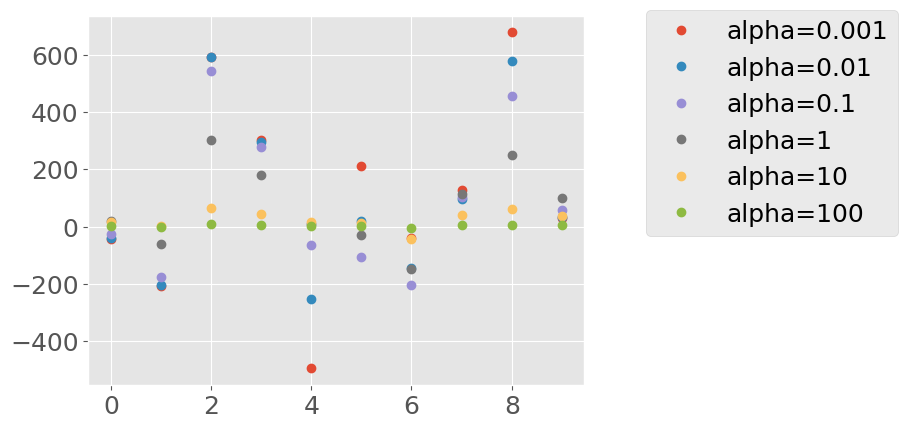

In [32]:
for val in alpha_values:
    ridge = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    plt.plot(ridge.coef_, "o", label=f"alpha={val}")
plt.legend(bbox_to_anchor=(1.1, 1.05))
pass

## Logistic regression

- A a supervised learning algorithm used for **classification problems**, despite its name.
- Uses a sigmoid function to map input values to probabilities
- Sigmoid function: $$f(x) = \frac{L}{1 + e^{-k(x -x_0)}}$$
- Standard sigmoid function:  $$f(x) = \frac{1}{1 + e^{-x}}$$

![](images/sigmoid.png) 

Fig: From Wikipedia 


- $\hat{p}(X_i) = \frac{1}{1 + \exp(-X_i w - w_0)}.$
- minimizes cross-entropy
- probability >0.5 : class 1, else class 0.  

- Cross-entropy measures *difference* between two probability distributions.
- It's often used as a loss function in classification problems to quantify how well the predicted probabilities match the actual class labels.

For **binary classification** (two classes: 0 and 1), the **cross-entropy loss** is calculated as:

$$
\rm{Cross-Entropy Loss} = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

$m$: number of samples; $y_i$: true label; $\hat{y}_i$ : predicted probability for class 1 (from the model)

- If the model predicts a high probability for the **correct class**, the loss will be small.
- If the model predicts a high probability for the **wrong class**, the loss will be large.

0.2231435513142097

0.2231435513142097

Text(0, 0.5, 'Cross Entropy')

Text(0.5, 0, 'Predicted $y$')

Text(0.5, 1.0, 'True y = 1')

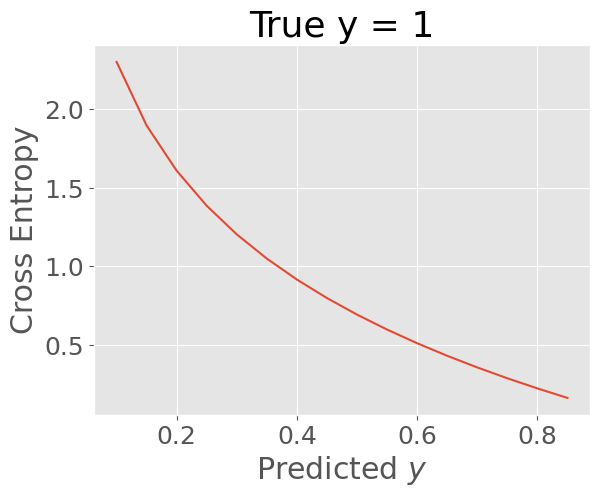

In [33]:
def binary_cross_entropy(y_true, y_pred):
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


# correct prediction
y_true_1 = 1
y_pred_1 = 0.8  # Predicted probability for class 1
binary_cross_entropy(y_true_1, y_pred_1)

# incorrect prediction
y_true_2 = 0
y_pred_2 = 0.2  # Predicted probability for class 1
binary_cross_entropy(y_true_2, y_pred_2)

x = np.arange(0.1, 0.9, 0.05)
cent = []
for _ in x:
    cent.append(binary_cross_entropy(1, _))
# cent
plt.plot(x, cent)
plt.ylabel("Cross Entropy")
plt.xlabel("Predicted $y$")
plt.title("True y = 1")

LogisticRegression()

Accuracy: 0.95


array([0, 0])

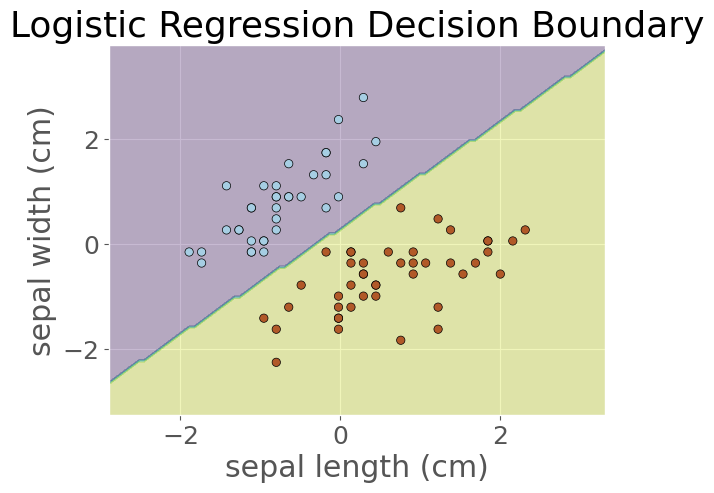

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
# read about scikit learn's documentation. for example, it applies a regularization by default while it's not strictly necessary, but helps in numerical stability.

iris = datasets.load_iris()

# using only two classes for visualization (Setosa & Versicolor)
# think about how will you modify the code and visualize it: 1) for more than two classes and 2) more than 2 properties
# first 100 samples (0 = Setosa, 1 = Versicolor)
X = iris.data[:100, :2]
y = iris.target[:100]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

model.predict([[1, 2], [1, 3]])


# warning: part of the code is generated by chatgpt! :)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Logistic Regression Decision Boundary")
    plt.show()


plot_decision_boundary(X_train, y_train, model)

## Bayes' rule and Naïve Bayes classifier

### Source: [Mark Hasegawa-Johnson and Svetlana Lazebnik, License: CC-BY 4.0](https://courses.grainger.illinois.edu/ece448/sp2020/slides/lec14.pdf)

Also see: [3Blue1Brown's series on probability](https://www.youtube.com/playlist?list=PLiAulSm0XXgvCGe63mrAkda9UQ9478YQv)

![alt text](images/bayes0.png)

![alt text](images/bayes1.png)

![alt text](images/bayes2.png)

## Naïve Bayes classifiers

- A probabilistic classifier based on Bayes' Theorem with the assumption of feature independence.
- Trade-off: Faster training but slightly worse generalization than LogisticRegression & LinearSVC.  
- Efficiency: Learns parameters per feature individually, using simple per-class statistics.  
- Types in scikit-learn:  
  - GaussianNB: For continuous data.  
  - BernoulliNB: For binary data.  
  - MultinomialNB: For count-based data (e.g., word frequency in text).  
- Usage: text classification, spam filtering, and sentiment analysis

**Algorithm**

- Input: Dataset $D$ with features $X = \{X_1, X_2, ..., X_n\}$ and class labels $Y$.  
- Calculate the prior probability of each class:  
$$
P(C_k) = \frac{\text{Count of samples in } C_k}{\text{Total number of samples}}
$$  
- For each feature $X_i$ given class $C_k$, compute the conditional probability $P(X_i | C_k)$  
- Compute the posterior probability for each class:  
$$
P(C_k | X) = \frac{P(X | C_k) P(C_k)}{P(X)}
$$  
- Make decision: Assign $X$ to the class $C_k$ with the *highest posterior probability*
$$
\hat{Y} = \arg\max_{C_k} P(C_k) \prod_{i} P(X_i | C_k)
$$  

Critical assumption:  Features $X_i$ are conditionally independent given the class $C_k$ (often doesn't hold in real-world datasets):  
$$
P(X_1, X_2, ..., X_n | C_k) = P(X_1 | C_k) P(X_2 | C_k) ... P(X_n | C_k)
$$  

### Example: classifying emails as Spam or Non-Spam

- Data

| Email | Contains Free? | Contains Win? | Spam |
| ----- | -------------- | ------------- | ---- |
| E1    | Yes            | Yes           | Yes  |
| E2    | No             | Yes           | No   |
| E3    | Yes            | No            | No   |
| E4    | Yes            | Yes           | Yes  |

- **Question: If a new email contains both Free and Win, is it spam?**

- **Calculate prior probabilities**

$$
P(\text{S}) =  \frac{2}{4} = 0.5, 
P(\text{NS}) =  \frac{2}{4} = 0.5
$$


- **Calculate likelihood** $P(\text{Feature} | \text{Class})$ for each feature:

$$
P(\text{Free} | \text{S}) = \frac{\text{Spam emails with `Free'}}{\text{Total S Emails}} = \frac{2}{2} = 1.0
$$

$$
P(\text{Free} | \text{NS}) = \frac{1}{2} = 0.5
$$

$$
P(\text{Win} | \text{S}) = \frac{2}{2} = 1.0
$$

$$
P(\text{Win} | \text{NS}) = \frac{1}{2} = 0.5
$$

- **Calculate posterior probabilities using Naïve Bayes**

$$
P(\text{S} | \text{Free, Win}) \propto P(\text{S}) \times P(\text{Free} | \text{S}) \times P(\text{Win} | \text{S})= 0.5 \times 1.0 \times 1.0 = 0.5
$$

$$
P(\text{NS} | \text{Free, Win}) \propto P(\text{NS}) \times P(\text{Free} | \text{NS}) \times P(\text{Win} | \text{NS}) = 0.5 \times 0.5 \times 0.5 = 0.125
$$


- **Decision**: Since $P(\text{S} | \text{Free, Win})>P(\text{NS} | \text{Free, Win})$,  it's a spam email.

See also:

- [StatQuest's video](https://www.youtube.com/watch?v=O2L2Uv9pdDA)

In [35]:
# code adapted from https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes. Please check it for details regarding implementations and parameters that you can tune.

from sklearn.naive_bayes import GaussianNB

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(
    "Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0], (y_test != y_pred).sum())
)

Number of mislabeled points out of a total 30 points : 1


## Decision Trees

- A hierarchy of if–else questions, represented by tree nodes and branches, that lead to a decision, or tree leaves. It's used for modeling classification and regression.
- Each root node represents an input variable and it's split point.
- Leaf nodes represent class labels and branches represent conjunctions of features leading to those labels.

### CART (Classification and Regression Trees)

#### Greedy Recursive Binary Splitting

- Divides the input space.
- Evaluates all input variables and split points to select the one with the lowest cost.
- cost function:
    - Regression: Sum of squared errors
    - Classification: Gini index (measures purity of leaf nodes)

##### Gini Index

- Measures "how mixed the data in a node is".
- A measure of how often a randomly chosen element of a set would be incorrectly labeled if it were labeled randomly and independently according to the distribution of labels in the set. 
- It becomes 0 when all cases in the node fall into a single target category.
- Consider a set of items has $J$ classes and relative frequencies $p_1, \cdots, p_J$ and the probability of miscategorizing that item is $\sum_{k \ne i} p_k = 1-p_i$. Then Gini index:

$$
{\rm I}_G(p) = \sum_{i=1}^J \left( p_i \sum_{k\neq i} p_k \right)
 = \sum_{i=1}^J p_i (1-p_i)
 = 1 - \sum^J_{i=1} p_i^2.
 $$
(see [wiki](https://en.wikipedia.org/wiki/Decision_tree_learning) and [this notes](https://www3.cs.stonybrook.edu/~cse352/L10basicDTalgorithm.pdf) for a broader discussion)

#### Pruning

- Stop the creation of the  tree early (pre-pruning)
- Remove nodes that contain little information (pruning)
- These prevent overfitting by controlling specificity to training data.
- Simpler trees are easier to interpret and generalize better. 

### Advantages

easily visualized and understood (interpretable). Also they work well with features having different scales, or a mix of binary and continuous features.


DecisionTreeClassifier(max_depth=2)

Accuracy on training set = 0.9666666666666667
Accuracy on test set: 0.9333333333333333
Feature importance: [0. 0. 0. 1.]


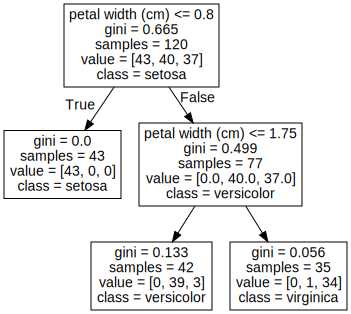

In [36]:
# code adapted from https://scikit-learn.org/stable/modules/tree.html#classification

from sklearn import tree
import graphviz

iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = (
    tree.DecisionTreeClassifier(max_depth=2)
)  # (max_depth=3) # max depth and complexity (overfitting)
clf = clf.fit(X, y)
clf.fit(X_train, y_train)
print(f"Accuracy on training set = {clf.score(X_train, y_train)}")
print(f"Accuracy on test set: {clf.score(X_test, y_test)}")
print(f"Feature importance: {clf.feature_importances_}")
# "if a feature has a low feature_importance, it doesn’t mean that this feature  is uninformative. It only means that the feature was not picked by the tree, likely  because another feature encodes the same information." (Guido & Müller)
dot_data = tree.export_graphviz(
    clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names
)
graph = graphviz.Source(dot_data)
graph

DecisionTreeRegressor(max_depth=2)

DecisionTreeRegressor(max_depth=5)

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'data')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'Decision Tree Regression')

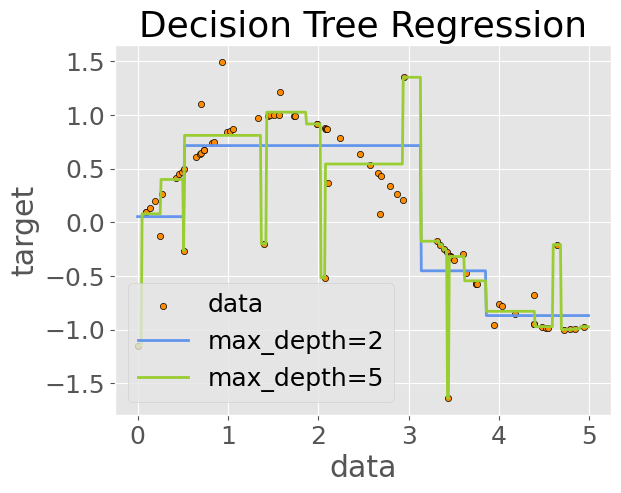

In [37]:
# A regression example
# code adapted from https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()